# The automated retrieval of financial data


This notebook focuses on automated data retrieval using the yfinance API.

In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/73/b5/d50eec88bc731bb8570ae42a9b764a36144e217361c33fa068391ff59ba3/yfinance-0.2.61-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/eb/7e/5d6e86b01742468e5265401529b60d4d24e4b61a751d24473a324da71b55/frozendict-2.4.6-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Using cached frozendict-2.4.6-cp39-cp39-macosx_10_9_x86_64.whl.metadata (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata

In [3]:
# Import the yfinance library to access Yahoo Finance data.
import yfinance as yf

### Fetching Stock Data

First we get the Ticker for the stock

In [4]:
apple = yf.Ticker("AAPL")

Now, we can get the historical market data by defining a start date and end date

In [5]:
startDate = '2020-01-01'
endDate = '2020-12-31'

hist = apple.history(start = startDate , end = endDate)

# If we don't specify an end date we get the data from the start to today/yesterday
# hist2 = apple.history(start = startDate)

# hist2

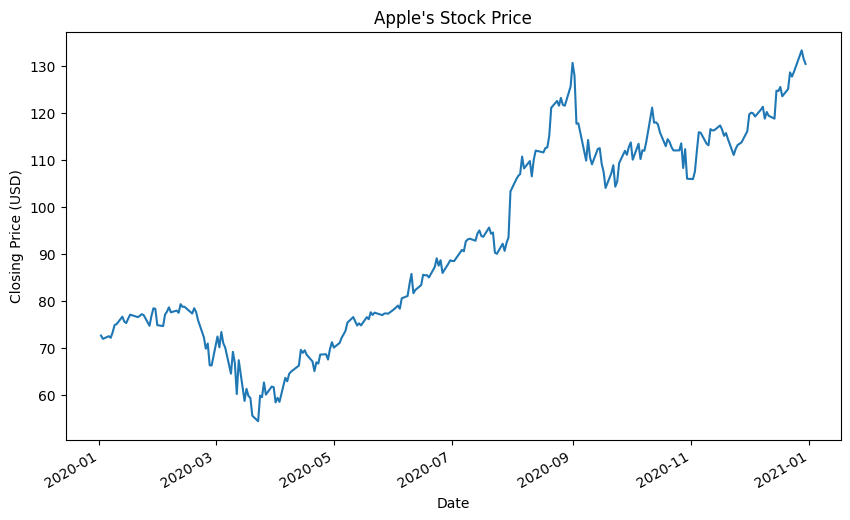

In [7]:
import matplotlib.pyplot as plt

hist['Close'].plot(figsize=(10, 6), title="Apple's Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

The frequecy of the data can be selected using with the period or interval aurgument.



In [ ]:
period = '1d'
hist = apple.history(period)

period2 ='1mo'
hist2 = apple.history(period2)

period3 = '1y'
hist3 = apple.history(period3)

### Fetching Multiple Stocks

This section of the Notebook replicates the dataset used in this semester's assignment using the yfinance API.

The .csv file that is imported contains the tickers from the current S&P 100 index constituents.

In [9]:
import pandas as pd

df = pd.read_csv("20144373.csv")

# Extract tickers from the dataframe
tickers = df['tic'].dropna().unique().tolist()
tickers = ['BRK-B' if ticker == 'BRK.B' else ticker for ticker in tickers]

# Download historical stock price data for the extracted tickers
sp100_data = yf.download(tickers, start="1997-12-01", end="2025-01-01", interval="1mo", auto_adjust=False)['Adj Close']

# Save the data to a CSV file
sp100_data.to_csv("sp100_historical_prices.csv")

# Display the first few rows
sp100_data.head()

[*********************100%***********************]  101 of 101 completed


Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1997-12-01,0.098616,NaN,7.456079,NaN,5.087876,460.697205,8.87500,9.356832,NaN,0.251042,...,6.942728,4.910829,9.204407,NaN,7.978294,NaN,11.529474,9.299020,4.166958,13.114411
1998-01-01,0.137591,NaN,8.060820,NaN,4.750912,467.647644,10.09375,8.643721,NaN,0.245833,...,8.443712,5.065259,8.878892,NaN,7.683811,NaN,11.727436,8.744081,4.213613,12.712538
1998-02-01,0.177508,NaN,8.549338,NaN,5.452753,509.510803,11.75000,9.183956,13.042768,0.320833,...,8.965405,5.998008,7.565560,NaN,8.215834,NaN,11.468890,9.838958,4.901546,13.663634
1998-03-01,0.206623,NaN,8.606479,NaN,5.576152,533.886536,14.53125,10.523730,15.107092,0.356380,...,8.366423,6.399520,8.333211,NaN,8.250717,NaN,13.066221,10.016949,5.377815,14.590751
1998-04-01,0.205684,NaN,8.356499,NaN,6.177729,558.075928,13.87500,10.307637,17.265244,0.382292,...,9.912186,6.946272,8.134125,NaN,8.851451,NaN,11.956072,9.610243,5.359480,15.763943


In [12]:
import numpy as np

sp100_data_returns = np.log(sp100_data) - np.log(sp100_data.shift(1))
sp100_data_returns = sp100_data_returns[1:]
sp100_data_returns.dropna(inplace=True, axis=1)
sp100_data_returns.head()

sp100_data_returns.to_csv("sp75_historical_returns.csv")

sp100_data_returns.head()

Ticker,AAPL,ABT,ADBE,AIG,AMD,AMGN,AMZN,AXP,BA,BAC,...,TGT,TMO,TXN,UNH,UNP,USB,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.333058,0.077986,-0.068524,0.014974,0.128678,-0.079274,-0.020968,-0.061754,-0.027186,-0.009357,...,0.063671,-0.120628,0.195727,0.030962,-0.036006,-0.037609,0.017024,-0.061532,0.011134,-0.031123
1998-02-01,0.254727,0.058839,0.137784,0.085736,0.151937,0.060625,0.266268,0.073413,0.130245,0.134575,...,0.072058,0.050010,0.059951,0.169022,-0.160070,0.066948,-0.022293,0.117973,0.151230,0.072149
1998-03-01,0.151879,0.006661,0.022378,0.046732,0.212448,0.136175,0.105077,0.019246,-0.037075,0.062769,...,0.131881,-0.015362,-0.069147,0.064796,0.096642,0.004237,0.130392,0.017929,0.092731,0.065650
1998-04-01,-0.004556,-0.029476,0.102452,0.044312,-0.046213,-0.020748,0.070187,0.107060,-0.040372,0.046658,...,-0.007843,-0.014029,0.169538,0.081982,-0.024181,0.070281,-0.088791,-0.041449,-0.003415,0.077337
1998-05-01,-0.027782,0.018361,-0.225558,-0.060714,-0.349621,0.014569,-0.040311,0.006423,-0.047293,-0.006601,...,0.060414,-0.125268,-0.219061,-0.093177,-0.123794,-0.035232,-0.013268,-0.025398,0.086393,-0.035702


### Getting Stocks Metadata

In [15]:
apple = yf.Ticker("AAPL")
apple.history_metadata

{'currency': 'USD',
 'symbol': 'AAPL',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 345479400,
 'regularMarketTime': 1747425600,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 211.26,
 'fiftyTwoWeekHigh': 260.1,
 'fiftyTwoWeekLow': 169.21,
 'regularMarketDayHigh': 212.57,
 'regularMarketDayLow': 209.77,
 'regularMarketVolume': 54737850,
 'longName': 'Apple Inc.',
 'shortName': 'Apple Inc.',
 'chartPreviousClose': 210.79,
 'previousClose': 211.45,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1747641600,
   'end': 1747661400,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1747661400,
   'end': 1747684800,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1747684800,
   'end': 1747699200,
   'gmtoffset': -14400}},
 'tradingPeriods':                 

### Getting Financial Statements

In [18]:
income_statement = apple.financials
balance_sheet = apple.balance_sheet
cash_flow = apple.cashflow

In [19]:
# Displaying the income statement.
print("Income Statement:")
print(income_statement.head())

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   

                                                        2023-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.147   
Normalized EBITDA                                   125820000000.0   
Net Income From Continuing Operation Net Minori...   96995000000.0   
Reconciled Depreciation                              11519000000.0   

                                                        2022-09-30  \
Tax Effect Of Unusual Items                                    0.0   


In [20]:
# Displaying the balance sheet.
print("\nBalance Sheet:")
print(balance_sheet.head())



Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  


In [21]:
# Displaying the cash flow statement.
print("\nCash Flow Statement:")
print(cash_flow.head())


Cash Flow Statement:
                                 2024-09-30     2023-09-30      2022-09-30  \
Free Cash Flow               108807000000.0  99584000000.0  111443000000.0   
Repurchase Of Capital Stock  -94949000000.0 -77550000000.0  -89402000000.0   
Repayment Of Debt             -9958000000.0 -11151000000.0   -9543000000.0   
Issuance Of Debt                        0.0   5228000000.0    5465000000.0   
Issuance Of Capital Stock               NaN            NaN             NaN   

                                2021-09-30   2020-09-30  
Free Cash Flow               92953000000.0          NaN  
Repurchase Of Capital Stock -85971000000.0          NaN  
Repayment Of Debt            -8750000000.0          NaN  
Issuance Of Debt             20393000000.0          NaN  
Issuance Of Capital Stock     1105000000.0  880000000.0  


In [22]:
# Displaying the Dividends of that stock (if given)
dividends = apple.dividends
splits = apple.splits
print("\nDividends:")
print(dividends, splits)


Dividends:
Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
Name: Dividends, Length: 87, dtype: float64 Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


### Getting Shareholder Data

In [23]:
aaple = yf.Ticker("AAPL")

In [24]:
aaple.major_holders

Breakdown,Value
insidersPercentHeld,0.02085
institutionsPercentHeld,0.63529
institutionsFloatPercentHeld,0.64882
institutionsCount,7009.00000


In [25]:
aaple.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2025-03-31,Vanguard Group Inc,0.0938,1400790809,295931058614,0.0036
1,2025-03-31,Blackrock Inc.,0.0763,1140202870,240879252052,0.0149
2,2025-03-31,State Street Corporation,0.0399,596025766,125916400051,0.0009
3,2025-03-31,"Geode Capital Management, LLC",0.0234,349807156,73900257855,0.0283
4,2025-03-31,"FMR, LLC",0.0220,328100180,69314442224,-0.0396
5,2025-03-31,"Berkshire Hathaway, Inc",0.0201,300000000,63377998352,0.0000
6,2025-03-31,Morgan Stanley,0.0162,241221800,50960516142,0.0124
7,2025-03-31,Price (T.Rowe) Associates Inc,0.0144,214703055,45358166219,-0.0246
8,2025-03-31,JPMORGAN CHASE & CO,0.0133,198745598,41986993941,0.0860
9,2024-12-31,NORGES BANK,0.0125,187160162,39539454796,0.0542


In [26]:
aaple.mutualfund_holders

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2024-12-31,VANGUARD INDEX FUNDS-Vanguard Total Stock Mark...,0.0317,473591874,100051016699,0.0344
1,2024-12-31,VANGUARD INDEX FUNDS-Vanguard 500 Index Fund,0.0274,409170316,86441318710,0.0279
2,2025-03-31,Fidelity Concord Street Trust-Fidelity 500 Ind...,0.0126,188467357,39815612804,-0.0045
3,2025-03-31,iShares Trust-iShares Core S&P 500 ETF,0.0123,183267922,38717180194,0.0322
4,2025-04-30,SPDR S&P 500 ETF TRUST,0.0121,180951189,38227747194,0.0062
5,2024-12-31,VANGUARD INDEX FUNDS-Vanguard Growth Index Fund,0.0102,152087687,32130043920,0.1240
6,2025-03-31,"Invesco QQQ Trust, Series 1",0.0084,125730621,26561850301,-0.0035
7,2024-12-31,VANGUARD INSTITUTIONAL INDEX FUNDS-Vanguard In...,0.0064,95471977,20169409336,-0.0127
8,2025-02-28,VANGUARD WORLD FUND-Vanguard Information Techn...,0.0048,72058722,15223125213,0.0773
9,2025-03-31,iShares Trust-iShares Russell 1000 Growth ETF,0.0035,52061182,10998445023,0.0238


## Example: Using yfinance data in portfolio construction

The following code uses the Britten-Jones (1999, JF) methodology to construct a portfolio using yfinance price data.

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso


In [28]:
# Dow Jones tickers
dow_tickers = [
    'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'DOW'
]

# Download adjusted closing prices
data = yf.download(dow_tickers, period='5y', interval='1d')['Close']

# Compute daily log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Dependent variable
y = np.ones(log_returns.shape[0])

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


In [29]:
# Finding the Lasso lambda (alpha) that selects exactly 5 stocks
alphas = np.linspace(0.000001, 0.001, 1000)
selected_alpha = None
selected_coefs = None

for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False, positive=True, max_iter=10000)
    lasso.fit(log_returns, y)
    if np.sum(lasso.coef_ != 0) == 5:
        selected_alpha = alpha
        selected_coefs = lasso.coef_
        break

# Display results
optimal_portfolio = pd.Series(selected_coefs, index=log_returns.columns)
optimal_portfolio = optimal_portfolio[optimal_portfolio != 0]

print("Optimal Portfolio Stocks and their weights:")
print(optimal_portfolio)
print(f"\nChosen Lasso alpha (lambda): {selected_alpha}")


Optimal Portfolio Stocks and their weights:
Ticker
AXP    0.096064
CAT    0.128797
GS     0.864764
IBM    0.110556
TRV    0.581197
dtype: float64

Chosen Lasso alpha (lambda): 0.0006380000000000001


In [30]:
for i in range(0, len(optimal_portfolio)):
    print(f"{i}: {optimal_portfolio[i]/sum(optimal_portfolio)}")

0: 0.05392687746676619
1: 0.07230194366341161
2: 0.4854466101105244
3: 0.06206214986868265
4: 0.326262418890615


/var/folders/kz/18_j95hs0qg31r0hxnhd6_300000gn/T/ipykernel_4646/4091913915.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{i}: {optimal_portfolio[i]/sum(optimal_portfolio)}")
